# Week12 Modeling

In [ ]:
! pip install -U yellowbrick
! pip install scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week12/'
%cd '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week12/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week12


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week12/cleaned_customer_segmentation2.csv")

In [ ]:
df.head()

,Unnamed: 0,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,29,MALAGA,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,13,CIUDAD REAL,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,13,CIUDAD REAL,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,50,ZARAGOZA,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,50,ZARAGOZA,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
fecha_dato,object
customer_id,int64
Employee_or_not,object
Customer_s_Country_residence,object
sexo,object
age,int64
fecha_alta,object
New_customer_Index,int64
Customer_seniority,int64


In [ ]:
#Label Encoding the categorical data types
def frequency_encoding(df, columns):
  """
  This is a function for applying frequency encoding to multiple categorical variable.
  :param df: pandas DataFrame
  :param colums: a list of columns to encode
  :return: DataFrame after encoding
  """

  #create a copy of the DataFrame to avoid modifying the original
  df_int = df.copy()

  for col in columns:
    freq_encoding = df[col].value_counts()/len(df)
    df_int[col] = df[col].map(freq_encoding)
  return df_int

In [ ]:
categorical_columns = ['Employee_or_not','sexo', 'Customer_relation_type_at_the_beginning_of_the_month', 'Residence_index', 'Foreigner_index', 'Deceased_index', 'Customer_s_Country_residence', 'age', 'Province_name', 'channel_used_by_the_customer_to_join', 'fecha_dato', 'fecha_alta']
df_int = frequency_encoding(df, categorical_columns)

In [ ]:
df_int.dtypes

,0
Unnamed: 0,int64
fecha_dato,float64
customer_id,int64
Employee_or_not,float64
Customer_s_Country_residence,float64
sexo,float64
age,float64
fecha_alta,float64
New_customer_Index,int64
Customer_seniority,int64


In [ ]:
df.head()


,Unnamed: 0,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,29,MALAGA,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,13,CIUDAD REAL,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,13,CIUDAD REAL,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,50,ZARAGOZA,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,50,ZARAGOZA,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_int.head()

,Unnamed: 0,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit
0,0,0.625457,1375586,0.999042,0.993046,0.427214,0.012679,0.000217,0,6,1,1,0.558582,0.993046,0.95711,0.000785,0.996889,1,29,0.026798,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.625457,1050611,0.999042,0.993046,0.572786,0.045366,0.001038,0,35,1,1,0.441377,0.993046,0.04289,0.249254,0.996889,1,13,0.007782,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.625457,1050612,0.999042,0.993046,0.572786,0.045366,0.001038,0,35,1,1,0.441377,0.993046,0.95711,0.249254,0.996889,1,13,0.007782,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0.625457,1050613,0.999042,0.993046,0.427214,0.051017,0.001038,0,35,1,1,0.441377,0.993046,0.95711,0.005878,0.996889,1,50,0.024621,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.625457,1050614,0.999042,0.993046,0.572786,0.045366,0.001038,0,35,1,1,0.558582,0.993046,0.95711,0.249254,0.996889,1,50,0.024621,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Before applying Kmeans, decided to apply PCA because the variables are many and there are not significanly correlated each variable.
By applying PCA, the variables can be efficient in terms of the calculation and it can reduce noises which would improve the result of kmeans.  

In [ ]:
# scale first
scaler = StandardScaler() # Initialize the Standard Scaler
data_scaled = scaler.fit_transform(df_int)  # fit_transform the scaler function on data
df_scaled = pd.DataFrame(data_scaled, columns=df.columns) # Converting the embeddings to a dataframe
df_scaled.head()

,Unnamed: 0,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit
0,-1.732049,0.773842,1.693807,0.030966,0.083682,-1.157906,-0.714099,-0.242561,-0.022005,-0.043541,-0.035078,-0.00652,0.887913,0.083682,0.211688,-2.230806,0.055863,0.0,0.171804,-0.788775,0.881802,-0.214565,-0.013305,-0.006245,0.577926,-0.024318,-0.343057,-0.117521,-0.099964,-0.519441,-0.278708,-0.046504,-0.056213,-0.267721,-0.344822,-0.167157,-0.100412,-0.121523,-0.068431,-0.279752,-0.266008,-0.202465,-0.080522,-0.276993,-0.293146,-0.446583
1,-1.732046,0.773842,0.890225,0.030966,0.083682,0.863628,1.791647,0.213978,-0.022005,-0.029050,-0.035078,-0.00652,-1.122886,0.083682,-4.723924,0.119081,0.055863,0.0,-1.119625,-0.900474,-1.134041,-0.452226,-0.013305,-0.006245,0.577926,-0.024318,-0.343057,-0.117521,-0.099964,-0.519441,-0.278708,-0.046504,-0.056213,-0.267721,-0.344822,-0.167157,-0.100412,-0.121523,-0.068431,-0.279752,-0.266008,-0.202465,-0.080522,-0.276993,-0.293146,-0.446583
2,-1.732042,0.773842,0.890228,0.030966,0.083682,0.863628,1.791647,0.213978,-0.022005,-0.029050,-0.035078,-0.00652,-1.122886,0.083682,0.211688,0.119081,0.055863,0.0,-1.119625,-0.900474,-1.134041,-0.053756,-0.013305,-0.006245,0.577926,-0.024318,-0.343057,-0.117521,-0.099964,-0.519441,-0.278708,-0.046504,-0.056213,-0.267721,-0.344822,-0.167157,-0.100412,-0.121523,-0.068431,-0.279752,-0.266008,-0.202465,-0.080522,-0.276993,-0.293146,-0.446583
3,-1.732039,0.773842,0.890230,0.030966,0.083682,-1.157906,2.224845,0.213978,-0.022005,-0.029050,-0.035078,-0.00652,-1.122886,0.083682,0.211688,-2.182639,0.055863,0.0,1.866804,-0.801563,-1.134041,-0.064812,-0.013305,-0.006245,-1.730325,-0.024318,-0.343057,-0.117521,-0.099964,-0.519441,-0.278708,21.503303,-0.056213,-0.267721,-0.344822,-0.167157,-0.100412,-0.121523,-0.068431,-0.279752,-0.266008,-0.202465,-0.080522,-0.276993,-0.293146,-0.446583
4,-1.732035,0.773842,0.890232,0.030966,0.083682,0.863628,1.791647,0.213978,-0.022005,-0.029050,-0.035078,-0.00652,0.887913,0.083682,0.211688,0.119081,0.055863,0.0,1.866804,-0.801563,0.881802,-0.125176,-0.013305,-0.006245,0.577926,-0.024318,-0.343057,-0.117521,-0.099964,-0.519441,-0.278708,-0.046504,-0.056213,-0.267721,-0.344822,-0.167157,-0.100412,-0.121523,-0.068431,-0.279752,-0.266008,-0.202465,-0.080522,-0.276993,-0.293146,-0.446583


In [ ]:
#Creating copy of the data
df_scaled_copy = df_scaled.copy(deep = True)

#PCA

In [ ]:
# apply PCA
n = 3
pca = PCA(n_components=n)  # choose 3 sections for PCA
data_pca = pca.fit_transform(df_scaled)

In [ ]:
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-1.315076,-1.385793,-0.447665
1,-2.444797,-1.586799,-2.241275
2,-2.370449,-2.055705,-0.520818
3,-1.931309,-2.175039,-0.772620
4,-1.264435,-1.630508,-0.355673


In [ ]:
sns.set()
exp_var = pca.explained_variance_

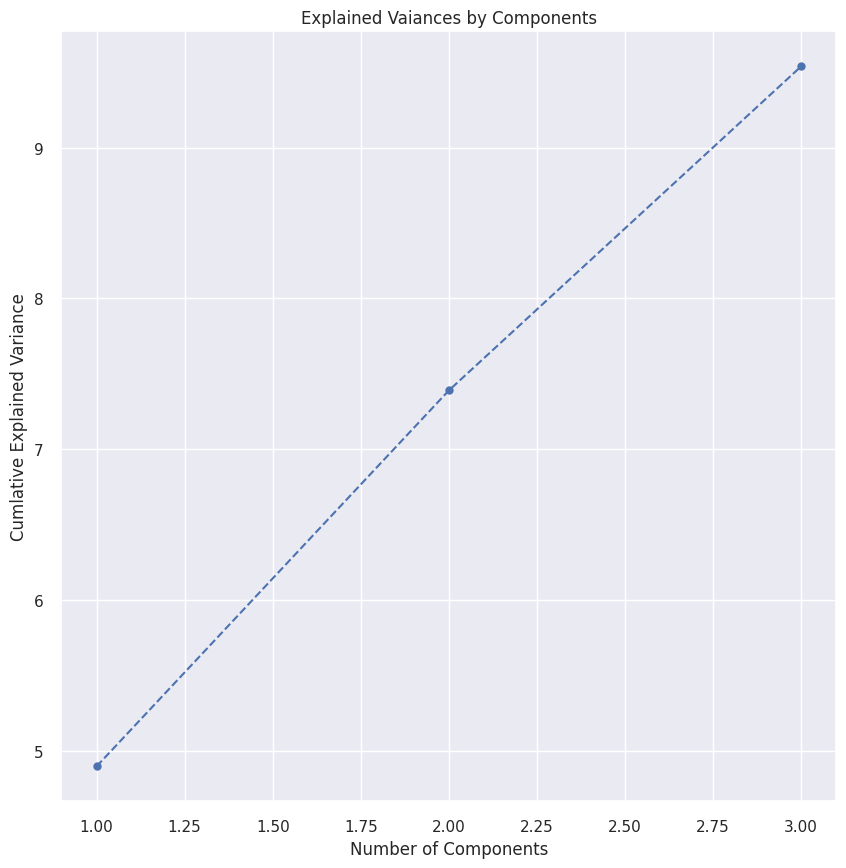

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(range(1,len(exp_var)+1), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Vaiances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumlative Explained Variance")
plt.show()

#Kmeans

In [ ]:
distortions = [] # Create an empty list

K = range(2, 10) # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4) # Initialize K-Means
    kmeanModel.fit(data_pca)                         # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_) # Append distortion values to the empty list created above

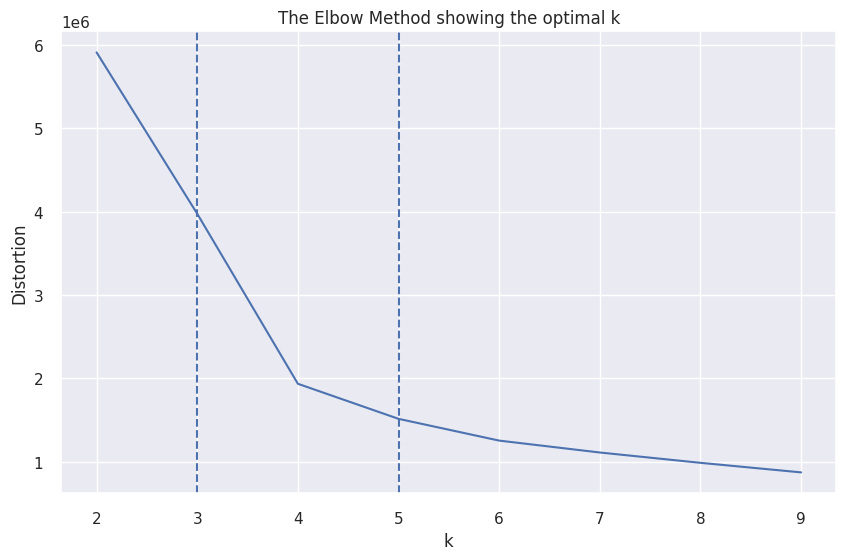

In [ ]:
# Plotting the elbow plot
plt.figure(figsize=(10, 6))     # Setting the plot size
plt.plot(K, distortions, "bx-") # Plotting the K on X-axis and distortions on y-axis
plt.axvline(3, linestyle='--')
plt.axvline(5, linestyle='--')
plt.xlabel("k")                 # Title of x-axis
plt.ylabel("Distortion")        # Title of y-axis
plt.title("The Elbow Method showing the optimal k") # Title of the plot
plt.show()

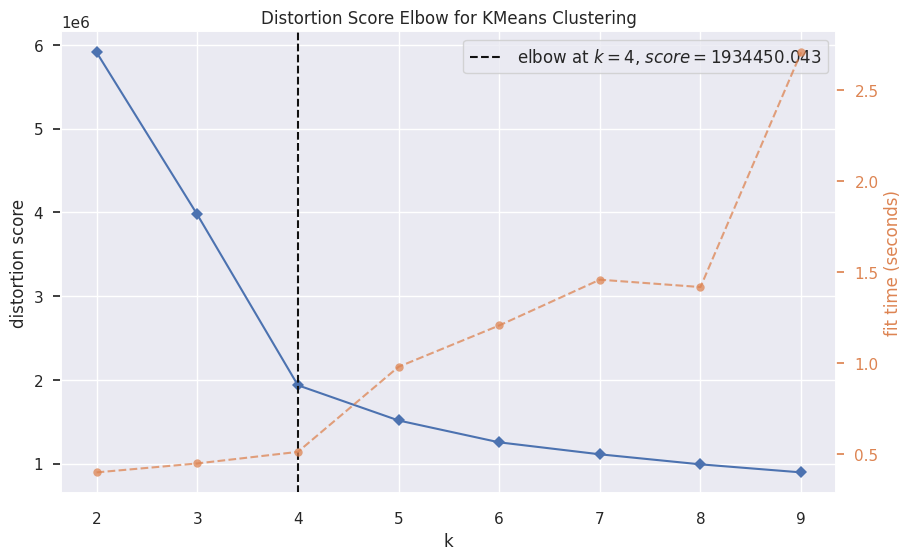

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
plt.figure(figsize=(10,6))
model = KMeans (random_state=1) #k is a range of the number of clusters.
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(data_pca) # Fit the data to the visualizer
visualizer.show() # Finalize and generate the plot

# Applying K-Means on data_pca

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)  # Initialize the K-Means algorithm with 4 clusters and random_state=1
kmeans.fit(data_pca)   # Fitting on the data_pca

KMeans(n_clusters=4, random_state=1)

In [ ]:
data_pca["K_means_segments_4"] = kmeans.labels_   # Adding K-Means cluster labels to the data_pca data

In [ ]:
#df["K_means_segments_4"] = kmeans.labels_  # Adding K-Means cluster labels to the df

In [ ]:
data_pca.head()

,PC1,PC2,PC3,K_means_segments_4
0,-1.315076,-1.385793,-0.447665,2
1,-2.444797,-1.586799,-2.241275,2
2,-2.370449,-2.055705,-0.520818,2
3,-1.931309,-2.175039,-0.772620,2
4,-1.264435,-1.630508,-0.355673,2


In [ ]:
# merge data_pca and df
merged_df = pd.concat([df.reset_index(drop=True), data_pca.reset_index(drop=True)], axis=1)

In [ ]:
merged_df.head()

,Unnamed: 0,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit,PC1,PC2,PC3,K_means_segments_4
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,29,MALAGA,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.315076,-1.385793,-0.447665,2
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,13,CIUDAD REAL,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.444797,-1.586799,-2.241275,2
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,13,CIUDAD REAL,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.370449,-2.055705,-0.520818,2
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,50,ZARAGOZA,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.931309,-2.175039,-0.772620,2
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,50,ZARAGOZA,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.264435,-1.630508,-0.355673,2


In [ ]:
df_stage = pd.read_csv("/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week12/df_with_lifestage.csv")

In [ ]:
df_stage.head()

,Unnamed: 0,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit,life_stage
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,29,MALAGA,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,lower_adult
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,13,CIUDAD REAL,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,lower_adult
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,13,CIUDAD REAL,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,lower_adult
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,50,ZARAGOZA,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,lower_adult
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,50,ZARAGOZA,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,lower_adult


In [ ]:
merged_df['life_stage'] = df_stage['life_stage']

In [ ]:
merged_df.head()

,Unnamed: 0,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit,PC1,PC2,PC3,K_means_segments_4,life_stage
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,29,MALAGA,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.315076,-1.385793,-0.447665,2,lower_adult
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,13,CIUDAD REAL,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.444797,-1.586799,-2.241275,2,lower_adult
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,13,CIUDAD REAL,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.370449,-2.055705,-0.520818,2,lower_adult
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,50,ZARAGOZA,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.931309,-2.175039,-0.772620,2,lower_adult
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,50,ZARAGOZA,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.264435,-1.630508,-0.355673,2,lower_adult


In [ ]:
merged_df.to_csv("df_with_pca.csv")

In [ ]:
data_pca.to_csv("data_pca.csv")

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=PCA.iloc[:, X], y=PCA.iloc[:, Y], data=PCA, hue=PCA[cluster], palette='mako')
    plt.title(f"PCA Plot of Clusters ({cluster})")
    plt.xlabel(f"PC{X + 1}")
    plt.ylabel(f"PC{Y + 1}")
    plt.show()

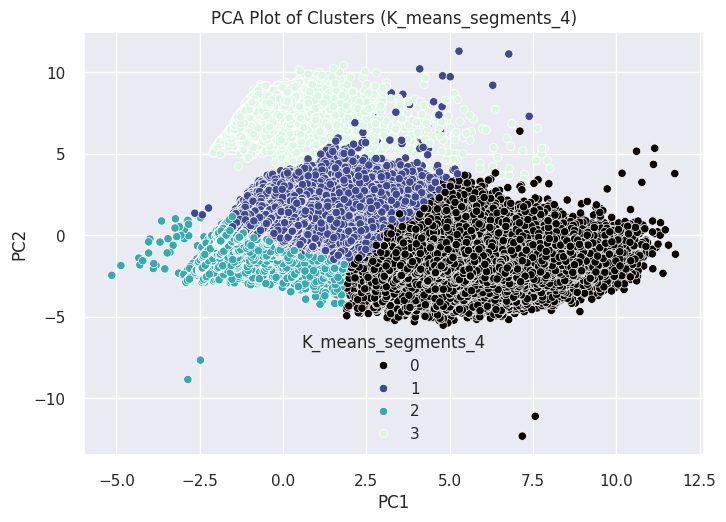

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_4")

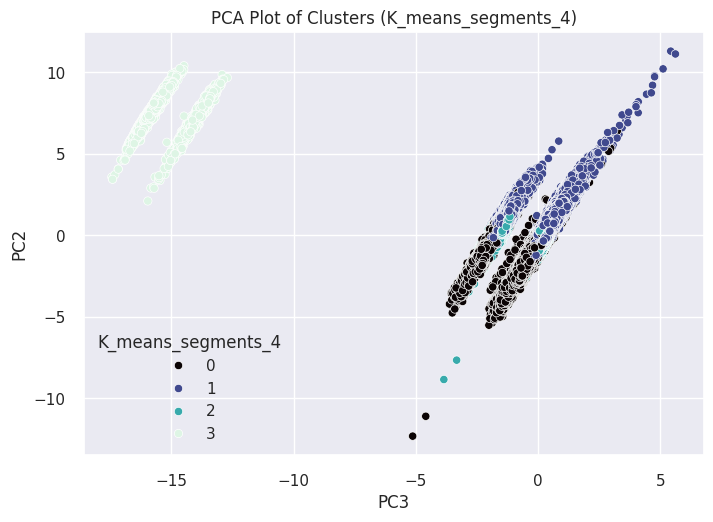

In [ ]:
PCA_PLOT(2, 1, data_pca, "K_means_segments_4")

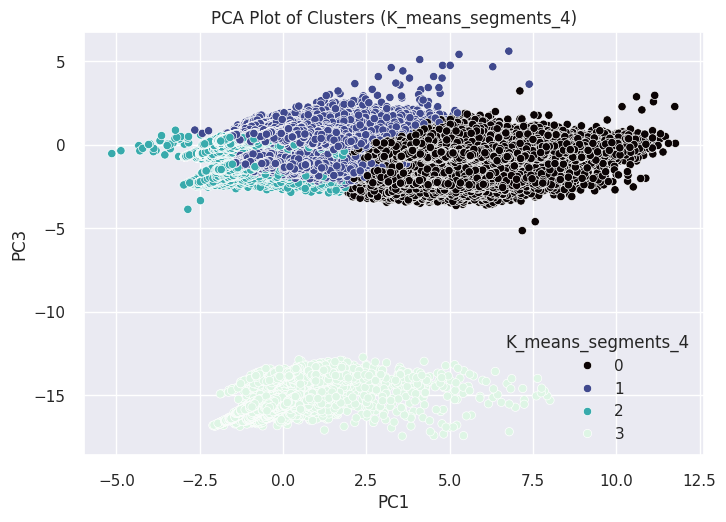

In [ ]:
PCA_PLOT(0, 2, data_pca, "K_means_segments_4")

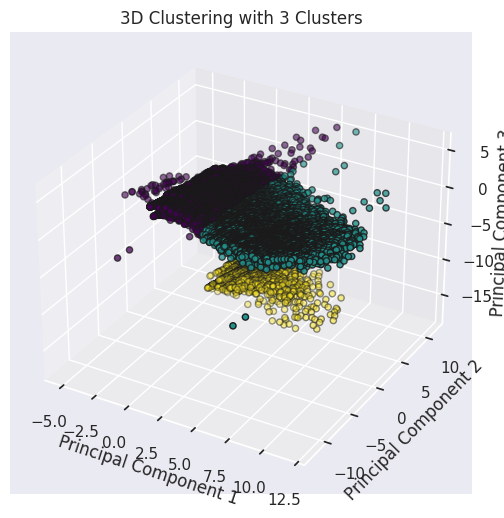

In [ ]:
def plot_3D_clusters(X, k):
    """Plot 3 attributes in dataset to explore natural clusters within data"""
    estimators = {'k_means': KMeans(n_clusters=k, n_init=10, random_state=42)}
    fignum = 1
    for name, est in estimators.items():
        fig = plt.figure(fignum, figsize=(8, 6))
        plt.clf()
        ax = fig.add_subplot(111, projection='3d')
        plt.cla()
        est.fit(X)
        labels = est.labels_
        # plot the result of clustering
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), edgecolor='k', cmap='viridis')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        ax.set_title(f'3D Clustering with {k} Clusters')
        fignum += 1
    plt.show()

# data after PCA
# if data_pca is the result of PCA (NumPy array or DataFrame)
if isinstance(data_pca, pd.DataFrame):
    X_pca = data_pca.iloc[:, :3].values  # get the first 3 pca
else:
    X_pca = data_pca[:, :3]  # in case of NumPy array, just slice

# clustering and visualization
plot_3D_clusters(X_pca, 3)